# **ESTRUTURA DO PROJETO**


**PASSO 1 - Importar as bibliotecas necessárias**


In [23]:
import os
import pandas as pd
from IPython.display import HTML
import plotly.express as px
import seaborn as sns
import numpy as np

**PASSO 2 - Percorrer todos os arquivos (planilhas) existentes dentro de uma pasta no Google Drive**


In [2]:
lista_planilhas = os.listdir(path="./arquivos")

**PASSO 3 - Importar todos os arquivos (planilhas) de vendas e unificá-las numa única tabela (DataFrame) no Pandas**


In [3]:
total_vendas = pd.DataFrame()

for planilha in lista_planilhas:
    if 'Vendas' in planilha:
        tabela = pd.read_csv(f"./arquivos/{planilha}")
        total_vendas = pd.concat([total_vendas, tabela])
display(total_vendas)

,Unnamed: 0,SKU,Produto,Quantidade,Primeiro Nome,Sobrenome,Data,Loja,Valor Unitário,Unnamed: 8
0,17,HL4379,Televisão,2,Carolina,Alfradique,2/25/2023,Belo Horizonte,2500,NaN
1,25,HL4379,Televisão,1,Danilo,Rubim,2/20/2023,Belo Horizonte,2500,NaN
2,27,HL1918,iPhone,5,Bernard,Pedrosa,7/7/2023,Belo Horizonte,5300,NaN
3,54,HL1918,iPhone,5,Lucas,Lemos,12/26/2023,Belo Horizonte,5300,NaN
4,67,HL8851,Notebook,5,Bernardo,Botelho,6/8/2023,Belo Horizonte,3500,NaN
...,...,...,...,...,...,...,...,...,...,...
2221,9981,HL7348,SmartWatch,4,Joío,Junior,4/14/2023,São Paulo,1400,NaN
2222,9984,HL1918,iPhone,4,Itai,Puntel,5/2/2023,São Paulo,5300,NaN
2223,9985,HL1918,iPhone,1,Guilherme,Vianna,3/18/2023,São Paulo,5300,NaN
2224,9991,HL7348,SmartWatch,5,Antônio,Soares,11/21/2023,São Paulo,1400,NaN


**PASSO 4 - Importar todos os arquivos (planilhas) de devoluções e unificá-las numa única tabela (DataFrame) no Pandas**


In [4]:
total_devolucoes = pd.DataFrame()

for planilha in lista_planilhas:
    if 'Devolucoes' in planilha:
        tabela = pd.read_csv(f"./arquivos/{planilha}")
        total_devolucoes = pd.concat([total_devolucoes, tabela])
display(total_devolucoes)

,Unnamed: 0,SKU,Produto,Quantidade,Data,Loja,Valor Unitário,Unnamed: 6
0,3,HL1918,iPhone,3,10/31/2023,Belo Horizonte,5300,NaN
1,6,HL7348,SmartWatch,1,2/6/2023,Belo Horizonte,1400,NaN
2,20,HL7348,SmartWatch,3,10/5/2023,Belo Horizonte,1400,NaN
3,21,HL9962,Android,1,5/26/2023,Belo Horizonte,3400,NaN
4,23,HL2714,Tablet,1,4/24/2023,Belo Horizonte,1600,NaN
...,...,...,...,...,...,...,...,...
97,477,HL4379,Televisão,5,4/5/2023,São Paulo,2500,NaN
98,478,HL8851,Notebook,1,10/27/2023,São Paulo,3500,NaN
99,486,HL7348,SmartWatch,5,4/13/2023,São Paulo,1400,NaN
100,487,HL2714,Tablet,2,9/7/2023,São Paulo,1600,NaN


# **INDICADORES**


**1.0 - QUANTIDADE DE VENDAS LÍQUIDAS:**

**Objetivo:** Identificar os 3 produtos e as 3 lojas que estão gerando mais vendas.


In [5]:
quantidade_produto_valor_liquido = total_vendas[[
    "SKU", 'Produto', 'Quantidade']].groupby(["SKU", 'Produto']).sum().sort_values(by='Quantidade', ascending=False)

quantidade_valor_loja_liquido = total_vendas[['Loja', 'Quantidade']].groupby(
    ['Loja']).sum().sort_values(by='Quantidade', ascending=False)

display(HTML('<h2>Quantidade de Vendas Líquida Por Produto: </h2>'))
display(quantidade_produto_valor_liquido.head(3))
display(HTML('<br /> <hr /> <br />'))
display(HTML('<h2>Quantidade de Vendas Líquida Por Loja: </h2>'))
display(quantidade_valor_loja_liquido.head(3))

,,Quantidade
SKU,Produto,
HL1918,iPhone,8974
HL4379,Televisão,5931
HL8851,Notebook,3249


,Quantidade
Loja,
São Paulo,6674
Rio de Janeiro,4393
Fortaleza,4320


In [6]:
# Grafico de Pizza ou torta
grafico1 = px.pie(quantidade_produto_valor_liquido.reset_index(),
                  names="Produto", values="Quantidade", title="Quantidade de Vendas Líquida Por Produto")
grafico1.update_traces(textposition="inside", textinfo="label+percent")
grafico1.show()

In [7]:
# Grafico de barras
grafico2 = px.bar(quantidade_valor_loja_liquido.reset_index(), x="Loja",
                  y="Quantidade", title="Quantidade de Vendas Líquida Por Loja", color="Quantidade")
grafico2.show()

**1.1 - QUANTIDADE DE VENDAS BRUTAS:**

**Objetivo:** Identificar os 3 produtos e as 3 lojas que estão gerando mais vendas.


In [8]:
quantidade_produto_valor_bruto = pd.DataFrame(pd.concat(
    [total_vendas, total_devolucoes]).groupby(["SKU", 'Produto'])['Quantidade'].sum()).sort_values(by='Quantidade', ascending=False)

quantidade_loja_valor_bruto = pd.DataFrame(pd.concat(
    [total_vendas, total_devolucoes]).groupby(["Loja"])['Quantidade'].sum()).sort_values(by='Quantidade', ascending=False)

display(HTML('<h2>Quantidade de vendas brutas dos 3 principais produtos</h2>'))
display(quantidade_produto_valor_bruto.head(3))
display(HTML('<br /> <hr /> <br />'))
display(HTML('<h2>Quantidade de vendas brutas das 3 principais lojas</h2>'))
display(quantidade_loja_valor_bruto.head(3))

,,Quantidade
SKU,Produto,
HL1918,iPhone,9144
HL4379,Televisão,6078
HL8851,Notebook,3423


,Quantidade
Loja,
São Paulo,6974
Rio de Janeiro,4614
Fortaleza,4591


In [9]:
# Grafico de barras
grafico3 = px.bar(
    quantidade_produto_valor_bruto.reset_index(),
    x="Produto",
    y="Quantidade",
    title="Quantidade de vendas brutas por Produtos",
    color="Produto"

)
grafico3.update_xaxes(categoryorder="total descending")  # ordenação
grafico3.update_layout(
    # plot_bgcolor="#e632ed",
    plot_bgcolor="rgba(0, 0, 0, 0)",
    paper_bgcolor="rgba(0, 0, 0, 0)",
    font_color="white"
)
grafico3.show()

In [10]:
# Grafico de barras
grafico4 = px.bar(
    quantidade_loja_valor_bruto.reset_index(),
    x="Loja",
    y="Quantidade",
    title="Quantidade de vendas brutas por Loja",
    color="Loja"

)
grafico4.update_layout(
    xaxis={
        'tickfont': {
            'color': 'blue',
            'size': 14
        },
        'title': {
            # 'text': 'Eixo X',
            'font': {
                'color': 'orange',
                'size': 18
            }
        }
    },
    yaxis={
        'tickfont': {
            'color': 'red',
            'size': 14
        },
        'title': {
            # 'text': 'Eixo Y',
            'font': {
                'color': 'violet',
                'size': 18
            }
        }
    }
)
grafico4.show()

**1.2 - QUANTIDADE DE DEVOLUÇÕES:**

**Objetivo:** Identificar os 3 produtos e as 3 lojas que estão gerando mais devoluções.


In [11]:
quantidade_produto_devolucao = total_devolucoes[[
    'Produto', 'Quantidade']].groupby(['Produto']).sum().sort_values(by='Quantidade', ascending=False)
# quantidade_produto_devolucao = total_devolucoes[[
#     "SKU", 'Produto', 'Quantidade']].groupby(["SKU", 'Produto']).sum().sort_values(by='Quantidade', ascending=False)

quantidade_produto_devolucao_loja = total_devolucoes[['Loja', 'Quantidade']].groupby(
    ['Loja']).sum().sort_values(by='Quantidade', ascending=False)

display(HTML('<h2>Quantidade de devoluções dos 3 principais Produtos</h2>'))
display(quantidade_produto_devolucao.head(3))
display(HTML('<br /> <hr /> <br />'))
display(HTML('<h2>Quantidade de devoluções das 3 principais lojas</h2>'))
display(quantidade_produto_devolucao_loja.head(3))

,Quantidade
Produto,
SmartWatch,395
Tablet,301
Android,187


,Quantidade
Loja,
São Paulo,300
Fortaleza,271
Rio de Janeiro,221


Text(0.5, 1.0, 'Quantidade de devoluções por produto e loja')

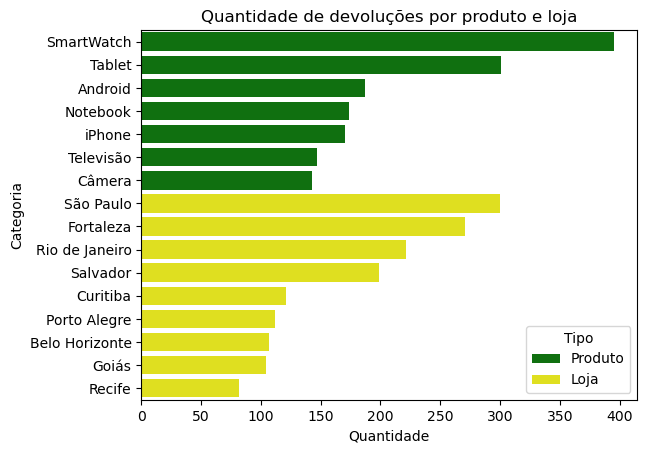

In [22]:
# Criar data frames
quantidade_produto_devolucao_grafico = pd.DataFrame(
    {
        'Categoria': quantidade_produto_devolucao.index,
        'Quantidade': quantidade_produto_devolucao['Quantidade'],
        'Tipo': ['Produto'] * len(quantidade_produto_devolucao)
    }
)
quantidade_produto_devolucao_loja_grafico = pd.DataFrame(
    {
        'Categoria': quantidade_produto_devolucao_loja.index,
        'Quantidade': quantidade_produto_devolucao_loja['Quantidade'],
        'Tipo': ['Loja'] * len(quantidade_produto_devolucao_loja)
    }
)

# concatenar df
df_concatenado = pd.concat(
    [quantidade_produto_devolucao_grafico, quantidade_produto_devolucao_loja_grafico])

cores = {'Produto': 'green', 'Loja': 'yellow'}
grafico5 = sns.barplot(df_concatenado, x="Quantidade", y="Categoria",
                       hue="Tipo", orient="h", palette=cores)
grafico5.set_title("Quantidade de devoluções por produto e loja")
# grafico5.set_xlabel("Rótulo eixo x")
# grafico5.set_ylabel("Rótulo eixo y")

**2.0 - ANÁLISE DE SAZONALIDADE:**

**Objetivo:** Calcular a variação das vendas dos produtos por mês.


In [13]:
data_formatada = pd.to_datetime(total_vendas['Data'], format="%m/%d/%Y")
venda_mensais = pd.DataFrame(
    {
        'Data': data_formatada,
        'Quantidade': total_vendas['Quantidade']
    }
)

venda_mensais = venda_mensais.set_index('Data').resample('ME').sum()
venda_mensais.index = venda_mensais.index.strftime('%b/%Y')
venda_mensais['Variacao'] = venda_mensais['Quantidade'].diff()

display(HTML('<h2>Variação de vendas dos produtos por mês</h2>'))
display(venda_mensais)

,Quantidade,Variacao
Data,,
Jan/2023,2553,NaN
Feb/2023,2508,-45.0
Mar/2023,2538,30.0
Apr/2023,2366,-172.0
May/2023,2357,-9.0
Jun/2023,2584,227.0
Jul/2023,2666,82.0
Aug/2023,2400,-266.0
Sep/2023,2446,46.0


In [33]:
# Grafico de linha
text_color = np.where(venda_mensais['Variacao'] < 0, 'red', 'blue')

grafico6 = px.line(
    venda_mensais.reset_index(),
    x='Data', 
    y='Quantidade',
    title='Vendas Mensais Sazonalidade',
    markers=True,
    text=venda_mensais['Quantidade']
)
grafico6.update_traces(textposition='top center', textfont=dict(color=text_color))
grafico6.show()

**2.1 - ANÁLISE DE FATURAMENTO TRIMESTRAL:**

**Objetivo:** Calcular o faturamento trimestral do ano.


In [14]:
faturamento_trimestral = pd.DataFrame(
    {
        'Data': data_formatada,
        'Quantidade': total_vendas['Quantidade'],
        'Valor Unitario': total_vendas['Valor Unitário'],
        'Faturamento': total_vendas['Quantidade'] * total_vendas['Valor Unitário']
    }
)

# Exemplo de valores possiveis
# D para dias
# M para meses
# Y para anos
# Q para trimestres
# W para semanas

faturamento_trimestral['Trimestre'] = faturamento_trimestral['Data'].dt.to_period(
    'Q')

faturamento_trimestral = pd.DataFrame(
    faturamento_trimestral.groupby('Trimestre')['Faturamento'].sum())

display(HTML('<h2>Faturamento trimestral:</h2>'))
display(faturamento_trimestral)

,Faturamento
Trimestre,
2023Q1,25038900
2023Q2,24163700
2023Q3,24970600
2023Q4,25146300


In [47]:
# Grafico de area
faturamento_trimestral.index = faturamento_trimestral.index.astype(str) # transformar os dados da coluna em string
text_color = np.where(faturamento_trimestral['Faturamento'].diff() < 0, 'red', 'blue')

grafico7 = px.area(
    faturamento_trimestral.reset_index(),
    x="Trimestre",
    y="Faturamento",
    title="Faturamento Trimestral",
    markers=True,
    text='Faturamento'
)
grafico7.update_layout(
    xaxis_title = 'Titulo X',
    yaxis_title = 'Titulo Y',
    # margin=dict(t=50, l=300, r=300, b=50)
    title=dict(x=0.5) # titulo centralizado escala %
)
grafico7.update_traces(
    fillcolor='rgba(27, 239, 143, 0.2)',
    line_color='rgba(27, 239, 143, 1)',
    marker=dict(color=text_color),
    textposition='top center'
)
grafico7.show()